# New Section

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/SM_FRIEND_NEWSDATA

/gdrive/My Drive/SM_FRIEND_NEWSDATA


In [ ]:
data = pd.read_csv('finalsamit_data.csv').apply(lambda x: x.astype(str).str.lower())

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [ ]:
Y= pd.get_dummies(data['label'].values)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # this is random splitting



In [ ]:
 from collections import Counter

 #count uniue words

 def counter_word(text):
     count = Counter()
     #for i in X_train:
     for i in X:
         for word in i.split():
             count[word] += 1
     return count 

In [ ]:
counter = counter_word(X)

In [ ]:
len(counter)

1185991

In [ ]:
counter = counter_word(X_train)
len(counter)

1096871

In [ ]:
num_words = len(counter)

#max number of words in a seuence
max_length = 500

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'পুলিশ': 1,
 'গতকাল': 2,
 'বছর': 3,
 'কথা': 4,
 'নাম': 5,
 'দেশ': 6,
 'শেষ': 7,
 'টাকা': 8,
 'কর্মকর্তা': 9,
 'সাল': 10,
 'তিন': 11,
 'জানান': 12,
 'ইসলাম': 13,
 'রহমান': 14,
 'উপজেলা': 15,
 'ঘটনা': 16,
 'জেলা': 17,
 'গ্রাম': 18,
 'নির্বাচন': 19,
 'সদস্য': 20,
 'মামলা': 21,
 'বাংলাদেশ': 22,
 'উপজেল': 23,
 'ম্যাচ': 24,
 'নেতা': 25,
 'লীগ': 26,
 'অভিযোগ': 27,
 'হিসেব': 28,
 'কমি': 29,
 'সকাল': 30,
 'প্রধান': 31,
 'মানুষ': 32,
 'এলাকা': 33,
 'কারণ': 34,
 'বিরুদ্ধ': 35,
 'হোস': 36,
 'হাসপাতাল': 37,
 'সভাপতি': 38,
 'ওপর': 39,
 'সম্পাদক': 40,
 'মাস': 41,
 'বিভাগ': 42,
 'কলেজ': 43,
 'লাখ': 44,
 'অনুষ্ঠান': 45,
 'সূত্র': 46,
 'সরক': 47,
 'দিন': 48,
 'আলো': 49,
 'রান': 50,
 'একজন': 51,
 'আওয়ামী': 52,
 'বিষ': 53,
 'অংশ': 54,
 'ভারত': 55,
 'থান': 56,
 'ব্যক্তি': 57,
 'ইউনিয়ন': 58,
 'পাঁচ': 59,
 'খান': 60,
 'ব্যাংক': 61,
 'শিক্ষক': 62,
 'আদালত': 63,
 'সদর': 64,
 'সময়': 65,
 'গ্রেপ্ত': 66,
 'বিএনপির': 67,
 'কর্মী': 68,
 'আলী': 69,
 'বন্ধ': 70,
 'সরকারি': 71,
 'শিক্ষার্থী': 72,
 'থাক': 73,
 'খবর':

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

In [ ]:
print(X_train[0])
print(train_sequences[0])

বাংলাদেশ কৃত্রিম উপগ্রহ বঙ্গবন্ধু স্যাটেলাইট উৎক্ষেপণ মূল শুরুর চুক্তি সাল ডিসেম্বর মহাকাশ কৃত্রিম উপগ্রহ স্যাটেলাইট উৎক্ষেপণ লক্ষ্য হয়েছেরাজধানীর হোটেল গতকাল ফ্রান্স থ্যালেস এলেনিয়া স্পেস চুক্তি টেলিযোগাযোগ নিয়ন্ত্রণ কমিশন বিটিআরসি চুক্তি স্বাক্ষর অনুষ্ঠান প্রধান অতিথি ডাক টেলিযোগাযোগ প্রতিমন্ত্রী তারানা হালিম উপস্থিতি বিটিআরসির চেয়ারম্যান শাহজাহান মাহমুদ থ্যালেস এলেনিয় চেয়ারম্যান জ্যঁ লইক গ্যাল নিজ নিজ চুক্তি করেনচুক্তি স্যাটেলাইট কাঠামো উৎক্ষেপণ ব্যবস্থা ভূমি মহাকাশ নিয়ন্ত্রণ ব্যবস্থা স্তর স্টেশন পরিচালনা ব্যবস্থা ফ্রান্স নির্মাতা প্রতিষ্ঠান ফ্রান্স থুলুজ স্যাটেলাইট মূল কাঠামো তৈরি থ্যালেসএ প্রকল্প ব্যয় টাকা উপগ্রহ উৎক্ষেপণ মূল স্যাটেলাইট সিস্টেম কেন খরচ লাখ টাকা সরকারি ক্রয় সংক্রান্ত মন্ত্রিসভা কমি স্যাটেলাইট সিস্টেম কেন ক্রয় প্রস্তাব অনুমোদন স্যাটেলাইট উৎক্ষেপণ চলতি বছর জানুয়ারি রাশিয় ইন্টারস্পুটনিক দশমিক ডিগ্রি পূর্ব দ্রাঘিমাংশ অরবিটাল স্লট কেন খরচ লাখ টাকাগাজীপুর জয়দেবপুর রাঙামা বেতবুনিয়ায় বঙ্গবন্ধু স্যাটেলাইট গ্রাউন্ড স্টেশন স্থাপন জায়গা প্রস্তাবিত স্যাটেলাইট ট্

In [ ]:
print(f"shape of train {train_padded.shape}")

shape of train (298969, 500)


In [ ]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (298969, 5)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [ ]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (74743, 500)
shape of testLlabel (74743, 5)


In [ ]:
#applied this for 4-2

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           37951712  
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 37,976,869
Trainable params: 37,976,869
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#NEW

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           70199744  
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               66000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 70,266,249
Trainable params: 70,266,249
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(train_padded, y_train, epochs=5, batch_size=128,validation_data=(test_padded,y_test),verbose=1,)

Epoch 1/5
2336/2336 [==============================] - 532s 215ms/step - loss: 1.1398 - accuracy: 0.6441 - val_loss: 1.1141 - val_accuracy: 0.6481
Epoch 2/5
2336/2336 [==============================] - 502s 215ms/step - loss: 1.1225 - accuracy: 0.6444 - val_loss: 1.1134 - val_accuracy: 0.6481
Epoch 3/5
2336/2336 [==============================] - 503s 215ms/step - loss: 1.0898 - accuracy: 0.6555 - val_loss: 0.7934 - val_accuracy: 0.7502
Epoch 4/5
2336/2336 [==============================] - 504s 216ms/step - loss: 0.8639 - accuracy: 0.7191 - val_loss: 0.4917 - val_accuracy: 0.7913
Epoch 5/5
2336/2336 [==============================] - 503s 215ms/step - loss: 0.4190 - accuracy: 0.8346 - val_loss: 0.1734 - val_accuracy: 0.9428


In [ ]:
score = model.evaluate(test_padded,y_test,verbose=0)
print('test score:' , score[0])
print('test accuracy:', score[1])

test score: 0.17336352169513702
test accuracy: 0.9428173899650574


In [ ]:
score = model.evaluate(train_padded,y_train,verbose=0)
print('test score:' , score[0])
print('test accuracy:', score[1])

test score: 0.14763975143432617
test accuracy: 0.9539350271224976


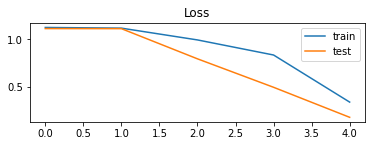

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


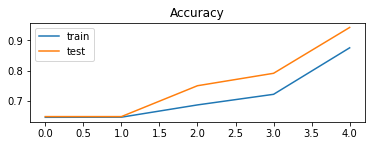

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_test

In [ ]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['eco','ent', 'int', 'sprt', 'state']

Confusion matrix, without normalization
[[ 2679    10   130     6   946]
 [    7  5337   324    65   315]
 [  219   111  5816    11   172]
 [    1   253     6  9834    62]
 [ 1058   213   289    76 46803]]


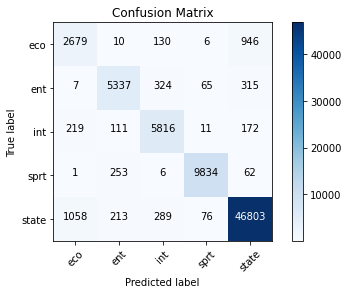

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

              precision    recall  f1-score   support

         eco       0.68      0.71      0.69      3771
         ent       0.90      0.88      0.89      6048
         int       0.89      0.92      0.90      6329
        sprt       0.98      0.97      0.98     10156
       state       0.97      0.97      0.97     48439

    accuracy                           0.94     74743
   macro avg       0.88      0.89      0.89     74743
weighted avg       0.94      0.94      0.94     74743



# **previous record**

In [ ]:
#DOESNT WORK for 4-2 (previous record) 

#work with 100
#NEW

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           37951712  
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 38,005,417
Trainable params: 38,005,417
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(train_padded, y_train, epochs=10, batch_size=128,validation_data=(test_padded,y_test),verbose=1,)

Epoch 1/10
2336/2336 [==============================] - 509s 217ms/step - loss: 1.1350 - accuracy: 0.6449 - val_loss: 1.1186 - val_accuracy: 0.6482
Epoch 2/10
2336/2336 [==============================] - 506s 216ms/step - loss: 1.0081 - accuracy: 0.6975 - val_loss: 0.8744 - val_accuracy: 0.7507
Epoch 3/10
2336/2336 [==============================] - 506s 217ms/step - loss: 1.0255 - accuracy: 0.6843 - val_loss: 0.8399 - val_accuracy: 0.7344
Epoch 4/10
2336/2336 [==============================] - 508s 217ms/step - loss: 0.8789 - accuracy: 0.7329 - val_loss: 0.8229 - val_accuracy: 0.7601
Epoch 5/10
2336/2336 [==============================] - 506s 217ms/step - loss: 0.8896 - accuracy: 0.7404 - val_loss: 0.7542 - val_accuracy: 0.7125
Epoch 6/10
2336/2336 [==============================] - 505s 216ms/step - loss: 0.7572 - accuracy: 0.7461 - val_loss: 0.6805 - val_accuracy: 0.7814
Epoch 7/10
2336/2336 [==============================] - 506s 216ms/step - loss: 0.5988 - accuracy: 0.7836 - val_